True


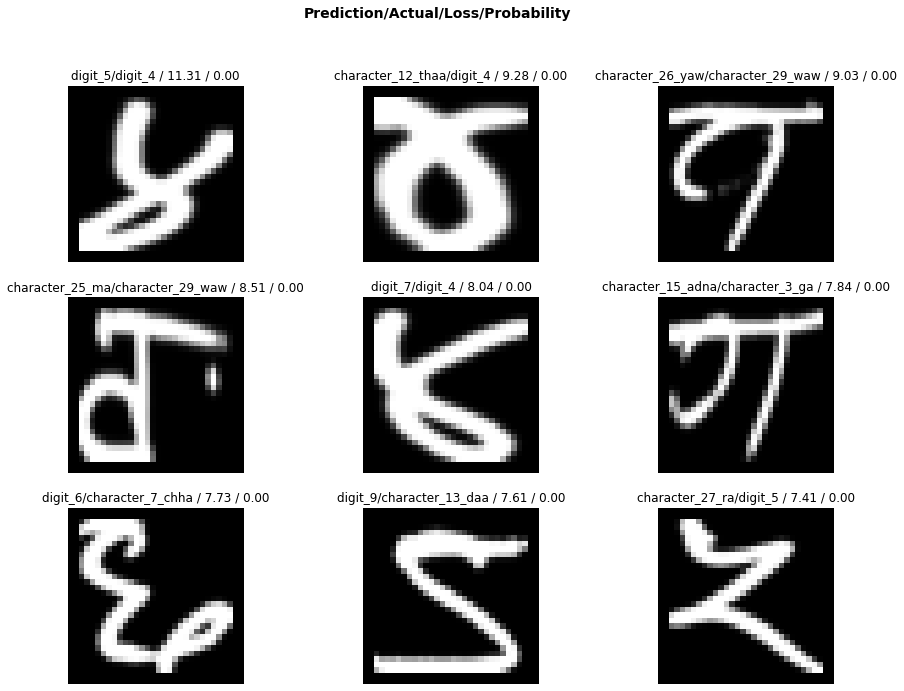

In [1]:
from fastai import *
from pathlib import Path
from fastai.vision import *
from fastai.metrics import error_rate

path = Path('/run/media/chinmay/DATA/Chinmay/Chinmay/Passions/DeepLearning/Projects/DevanagariChars/DevanagariHandwrittenCharacterDataset/')
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=32)
learn = cnn_learner(data, models.resnet34, metrics=error_rate)
learn.load('stage-1')
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

print(len(data.valid_ds)==len(losses)==len(idxs))
interp.plot_top_losses(9, figsize=(15,11))

In [2]:
interp.most_confused(min_val=2)

[('character_19_dha', 'character_17_tha', 41),
 ('character_17_tha', 'character_26_yaw', 34),
 ('character_18_da', 'character_14_dhaa', 31),
 ('character_26_yaw', 'character_17_tha', 19),
 ('character_31_petchiryakha', 'character_21_pa', 19),
 ('character_13_daa', 'character_33_ha', 18),
 ('character_33_ha', 'character_18_da', 18),
 ('character_10_yna', 'character_8_ja', 17),
 ('character_20_na', 'character_28_la', 17),
 ('character_14_dhaa', 'character_18_da', 16),
 ('character_32_patalosaw', 'character_25_ma', 16),
 ('character_32_patalosaw', 'character_2_kha', 16),
 ('character_7_chha', 'character_18_da', 16),
 ('character_4_gha', 'character_19_dha', 15),
 ('character_5_kna', 'character_13_daa', 15),
 ('digit_6', 'character_7_chha', 15),
 ('character_23_ba', 'character_29_waw', 14),
 ('character_29_waw', 'character_23_ba', 14),
 ('character_6_cha', 'character_26_yaw', 14),
 ('character_21_pa', 'character_31_petchiryakha', 13),
 ('character_4_gha', 'character_17_tha', 13),
 ('charact

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time


In [ ]:
learn.load('stage-1')

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

In [ ]:
learn.save("stage-2")

In [ ]:
learn.load("stage-2")